# Segmentation_EMStack_CurrentBestArchitecture#
### In this example, the best current architecture is being explored. Limitations for this task are the amount of time training takes, the more layers are added.
#### Network ####
See below
#### Note ####
Almost always converges to a nice solution.

In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import numpy as np
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.7.3
['/home/adria/Documents/Documents/TUM/dlfs/libdl/python', '/home/adria/anaconda3/lib/python37.zip', '/home/adria/anaconda3/lib/python3.7', '/home/adria/anaconda3/lib/python3.7/lib-dynload', '', '/home/adria/anaconda3/lib/python3.7/site-packages', '/home/adria/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/Documents/TUM/dlfs/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb

In [3]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage import io
imTrain = io.imread(os.getcwd() + '/data/train-volume.tif')
NumImages = 30;
ImageDim = 512 * 512
imsTrain = np.reshape(imTrain, (NumImages, ImageDim)).transpose() 
imsTrain = imsTrain.astype(np.double)/255

imTest = io.imread(os.getcwd() + '/data/test-volume.tif')
imsTest = np.reshape(imTest, (NumImages, ImageDim)).transpose() 
imsTest = imsTest.astype(np.double)/255

lbTrain = io.imread(os.getcwd() + '/data/train-labels.tif')
lbsTrain = np.reshape(lbTrain, (NumImages, ImageDim)).transpose()
enc = OneHotEncoder(categories='auto')
enc.fit(lbsTrain.reshape(-1, 1))
lbsTrainOneHot = np.zeros((ImageDim,NumImages * 2))
for idx in range(0,NumImages):
    lbsTrainOneHot[:,2*idx:(2*idx +2)] = enc.transform(lbsTrain[:,idx].reshape(-1, 1)).toarray()
idx = 0
someIm0 = imsTrain[:,0];
someLb0 = lbsTrain[:,0];
someIm1 = imsTrain[:,1];
someLb1 = lbsTrain[:,1];

In [4]:
print("Values per Image:", imsTrain.shape[0])
print("Number of images for training:", imsTrain.shape[1])

print("Values per  Label Image:", lbsTrainOneHot.shape[0])
print("Number of images for Label training:", lbsTrainOneHot.shape[1])
plt.ion()
inputVar = 30 # change to visualize
while inputVar < 30:
    f = plt.figure(figsize=(20,5))
    f.suptitle('Original image and One Hot Labels', fontsize=16)
    plt.subplot(131)
    plt.imshow(np.reshape(imsTrain[:,inputVar],(512,512)), interpolation='nearest', cmap='gray')
    plt.subplot(132)
    plt.imshow(np.reshape(lbsTrainOneHot[:,2 * inputVar],(512,512)), interpolation='nearest', cmap='gray')
    plt.subplot(133)
    plt.imshow(np.reshape(lbsTrainOneHot[:,2 * inputVar + 1],(512,512)), interpolation='nearest', cmap='gray')
    plt.show()
    inputVar = int(input("Next Index? (Press 30 or larger escape)."))# wait for input from the user

Values per Image: 262144
Number of images for training: 30
Values per  Label Image: 262144
Number of images for Label training: 60


In [5]:
labelDepth = 2
#segSimple = pyb.SegmentationExample1(512,512,1,convolutionDepth,labelDepth)
segSimple = pyb.SegmentationExample8(512,512,1,labelDepth)

Conv In Depth: 1 In Height: 512 In Width: 512 Out Depth: 8 Out Height: 512 Out Width: 512
Conv In Depth: 8 In Height: 512 In Width: 512 Out Depth: 16 Out Height: 512 Out Width: 512
Maxp In Depth: 16 In Height: 512 In Width: 512 Out Depth: 16 Out Height: 256 Out Width: 256
Conv In Depth: 16 In Height: 256 In Width: 256 Out Depth: 32 Out Height: 256 Out Width: 256
Conv In Depth: 32 In Height: 256 In Width: 256 Out Depth: 32 Out Height: 256 Out Width: 256
Maxp In Depth: 32 In Height: 256 In Width: 256 Out Depth: 32 Out Height: 128 Out Width: 128
Tran In Depth: 32 In Height: 128 In Width: 128 Out Depth: 32 Out Height: 256 Out Width: 256
Conv In Depth: 32 In Height: 256 In Width: 256 Out Depth: 16 Out Height: 256 Out Width: 256
Tran In Depth: 16 In Height: 256 In Width: 256 Out Depth: 8 Out Height: 512 Out Width: 512
Conv In Depth: 8 In Height: 512 In Width: 512 Out Depth: 2 Out Height: 512 Out Width: 512


In [6]:
segSimple.Train(imsTrain,lbsTrainOneHot,0.0000005,12)
segSimpleOut = segSimple.Test(imsTrain[:,0])

Loss of a given sample at epoch: 0
43536.2
Loss of a given sample at epoch: 1
37053
Loss of a given sample at epoch: 2
30982.6
Loss of a given sample at epoch: 3
38525.3
Loss of a given sample at epoch: 4
42216.9
Loss of a given sample at epoch: 5
28611
Loss of a given sample at epoch: 6
28214.5
Loss of a given sample at epoch: 7
34072.6
Loss of a given sample at epoch: 8
28118.1
Loss of a given sample at epoch: 9
29096.4
Loss of a given sample at epoch: 10
27002.5
Loss of a given sample at epoch: 11
29270.9
testing:


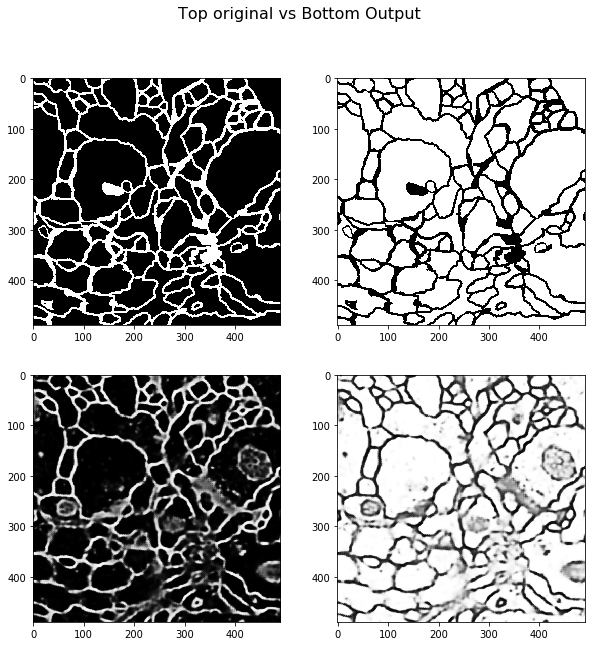

In [7]:
# Since the testing labels are not provided, here I check one of the training images.
f = plt.figure(figsize=(10,10))
f.suptitle('Top original vs Bottom Output', fontsize=16)
plt.subplot(221)
plt.imshow(np.reshape(lbsTrainOneHot[:,0],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(222)
plt.imshow(np.reshape(lbsTrainOneHot[:,1],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(223)
plt.imshow(np.reshape(segSimpleOut[:,0],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(224)
plt.imshow(np.reshape(segSimpleOut[:,1],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.show()

testing:


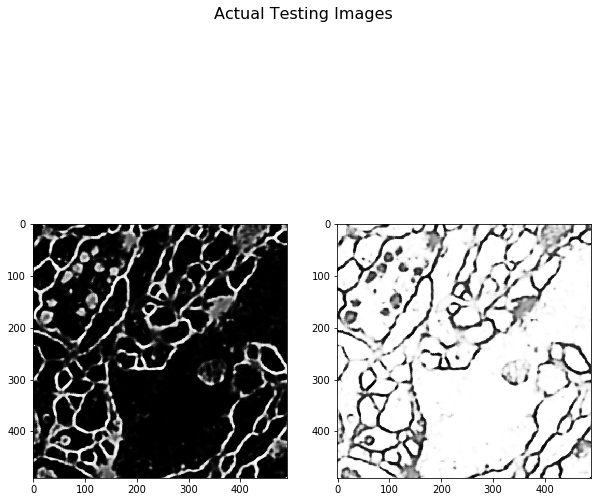

In [8]:
segSimpleOut = segSimple.Test(imsTest[:,0])
f = plt.figure(figsize=(10,10))
f.suptitle('Actual Testing Images', fontsize=16)
plt.subplot(121)
plt.imshow(np.reshape(segSimpleOut[:,0],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(segSimpleOut[:,1],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.show()

In [9]:
segSimpleOut.tolist()

[[0.45005266521109727, 0.4487641823252817],
 [0.29360774171940474, 0.7687787530488663],
 [0.028051602335505965, 0.9341108480280933],
 [0.07257613611502792, 0.9742567532026132],
 [0.028395115061138818, 0.9621028794948034],
 [0.08605481906330055, 0.9258227213823833],
 [0.024744243080170307, 0.9365325295698387],
 [0.13273215241245523, 0.9302124121726945],
 [0.056202536930892444, 0.9062197589254174],
 [0.10454002221276999, 0.9207089430752435],
 [0.027146012489371193, 0.9446262621782002],
 [0.10596029262830484, 0.9499294115423715],
 [0.044605392094031526, 0.9296807283087121],
 [0.08994994767658325, 0.9302523527068834],
 [0.024712588301076803, 0.9491505878371702],
 [0.09617349812344363, 0.9551716476103942],
 [0.038104736379270164, 0.940317212598468],
 [0.05270883648684433, 0.9514253753253465],
 [0.015732144197839703, 0.9715521972939181],
 [0.05135660168351776, 0.9774705460084696],
 [0.02431236204356828, 0.9624697175449286],
 [0.060730559413112555, 0.9464106747412093],
 [0.053393172026662994,